<a href="https://colab.research.google.com/github/Aaryant31/Credit-Card-Default-Prediction/blob/main/Rahul_kumar_soni_Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [323]:
#Importing lbrary 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import time
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, plot_precision_recall_curve
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

In [324]:
data='https://github.com/Aaryant31/Credit-Card-Default-Prediction/blob/main/default%20of%20credit%20card%20clients.xls?raw=true'


In [325]:
pd.read_excel(data)

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [326]:
#reading data
df=pd.read_excel(data,header=1)

# Data inspection

In [327]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [328]:
#checking information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [329]:
#checking null values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

**No null value found**

In [330]:
#describing data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [331]:
#checking 1st Row
df.iloc[0,:]

ID                                1
LIMIT_BAL                     20000
SEX                               2
EDUCATION                         2
MARRIAGE                          1
AGE                              24
PAY_0                             2
PAY_2                             2
PAY_3                            -1
PAY_4                            -1
PAY_5                            -2
PAY_6                            -2
BILL_AMT1                      3913
BILL_AMT2                      3102
BILL_AMT3                       689
BILL_AMT4                         0
BILL_AMT5                         0
BILL_AMT6                         0
PAY_AMT1                          0
PAY_AMT2                        689
PAY_AMT3                          0
PAY_AMT4                          0
PAY_AMT5                          0
PAY_AMT6                          0
default payment next month        1
Name: 0, dtype: int64

In [332]:
#droping Id Column since its is unique for every row
df=df.drop('ID',axis=1)

In [333]:
#viewing Data

df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Data cleaning

In [334]:
df['LIMIT_BAL'].max()

1000000

In [335]:
df['LIMIT_BAL'].min()

10000

In [336]:
#renaming dependendent Variable
df.rename(columns={'default payment next month' : 'Defaulters'}, inplace=True)

In [337]:
# renaming some feature name for better understanding of feature
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)

df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)

df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [338]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulters
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Exploratory Data Analysis and feature Engineering

In [339]:
#checking dependent valriable
df['Defaulters'].value_counts()

0    23364
1     6636
Name: Defaulters, dtype: int64

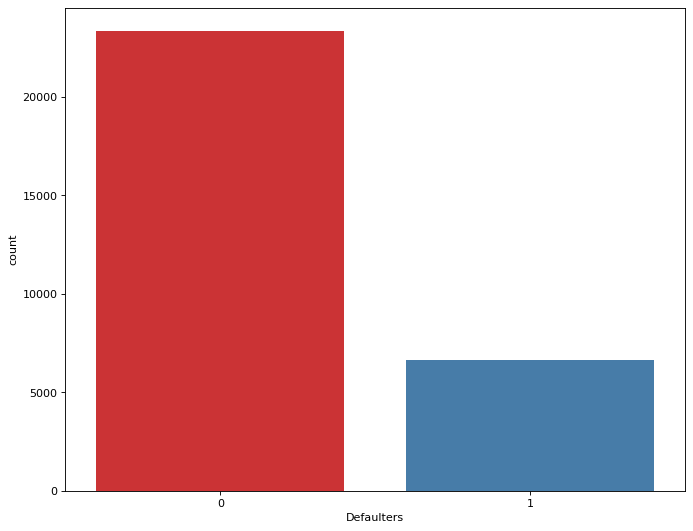

In [340]:
#visualizing dependent variable
plt.figure(figsize=(10,8),dpi=80)
sns.countplot(x='Defaulters',data=df,palette='Set1')

**We can see that we have quite imbalance dataset**

## Bivariate Analysis

In [341]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

In [342]:
df_cat = df[categorical_features]


In [343]:
df_cat.shape

(30000, 3)

In [344]:
df_cat.head()

,SEX,EDUCATION,MARRIAGE
0,2,2,1
1,2,2,2
2,2,2,2
3,2,2,1
4,1,2,1


In [345]:
#checking value counts of categorical_features
for column_name in df_cat.columns:
  print(f'count of {column_name} features')
  print(f'\n{df_cat[column_name].value_counts()}\n')

count of SEX features

2    18112
1    11888
Name: SEX, dtype: int64

count of EDUCATION features

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

count of MARRIAGE features

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64



In [346]:
#maping numerical value to categorical for easy understanding
df_cat['SEX']=df_cat['SEX'].map({1:'Male',2:'Female'})
df_cat['EDUCATION']=df_cat['EDUCATION'].map({1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'other',5:'other',6:'other',0:'other'})
df_cat['MARRIAGE']=df_cat['MARRIAGE'].map({1 : 'married', 2 : 'single', 3 : 'others',0 : 'others'})

In [347]:
df_cat.head()

,SEX,EDUCATION,MARRIAGE
0,Female,university,married
1,Female,university,single
2,Female,university,single
3,Female,university,married
4,Male,university,married


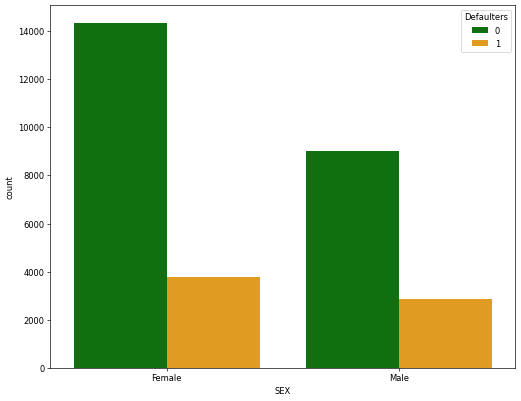

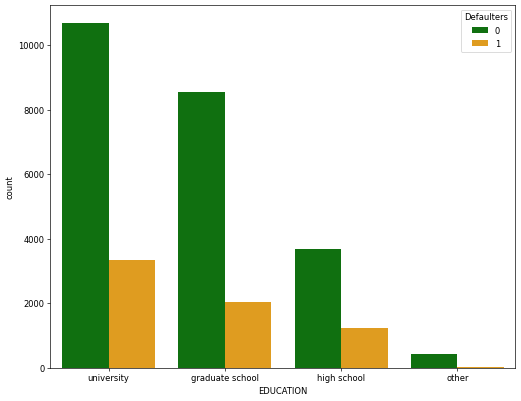

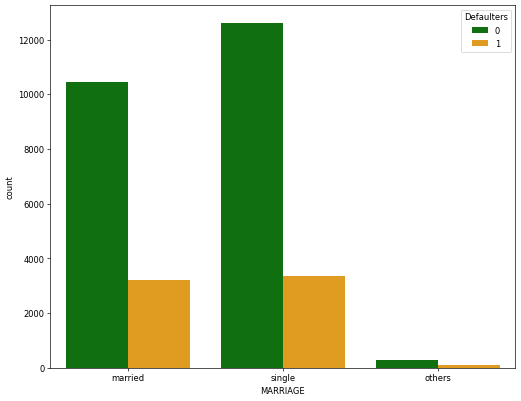

In [348]:
for column_name in df_cat.columns:
  plt.figure(figsize=(10,8),dpi=60)
  sns.countplot(x=column_name,data=df_cat,hue=df['Defaulters'],palette=["green",'orange'])
  plt.show()

In [349]:
#checking value counts of categorical_features
for column_name in df_cat.columns:
  print(f'count of {column_name} features')
  print(f'\n{df_cat[column_name].value_counts()}\n')

count of SEX features

Female    18112
Male      11888
Name: SEX, dtype: int64

count of EDUCATION features

university         14030
graduate school    10585
high school         4917
other                468
Name: EDUCATION, dtype: int64

count of MARRIAGE features

single     15964
married    13659
others       377
Name: MARRIAGE, dtype: int64



In [350]:
df_cat['Defaulter'] = df['Defaulters']

In [351]:
df_cat.head()

,SEX,EDUCATION,MARRIAGE,Defaulter
0,Female,university,married,1
1,Female,university,single,1
2,Female,university,single,0
3,Female,university,married,0
4,Male,university,married,0


In [352]:
#checking the defaulter ratio of categories
for column_name in df_cat.columns[:-1]:
  print(df_cat[['Defaulter',column_name]].groupby(column_name).mean().reset_index())

      SEX  Defaulter
0  Female   0.207763
1    Male   0.241672
         EDUCATION  Defaulter
0  graduate school   0.192348
1      high school   0.251576
2            other   0.070513
3       university   0.237349
  MARRIAGE  Defaulter
0  married   0.234717
1   others   0.236074
2   single   0.209283


### observation
for Sex feature:
  - we can see that  number of females are more than the males
  - but the default ratio of male is quite higher than female

for Education feature:
  - university and High School pesons are more likely to be defaulter in comparison with  the graduate school persons.

for Marriage feature:
  - people who are not married nor single are more likely to make default of bills in comparison with single and married person

In [353]:
df['AGE'].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

### observation
- we can see here min age is 21 and maximum age is 79 in our dataset

In [354]:
# creating function to create the cohort for age group
def age_cohort(age):
  if age in range(21,31) : # starting from 21 because minimum age is 21 in our dataset
    return '21-30'
  elif age in range(31,41) :
    return '31-40'
  elif age in range(41,51) :
    return '41-50'
  elif age in range(51,61) :
    return '51-60'
  else:
    return '60 & above'

In [355]:
#creating age_group column in our data set
df['age_group']=df['AGE'].apply(lambda x: age_cohort(x))

In [356]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulters,age_group
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,21-30
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,21-30
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,31-40
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,31-40
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,51-60


In [357]:
df['age_group'].value_counts().sort_values(ascending=False)

21-30         11013
31-40         10713
41-50          6005
51-60          1997
60 & above      272
Name: age_group, dtype: int64

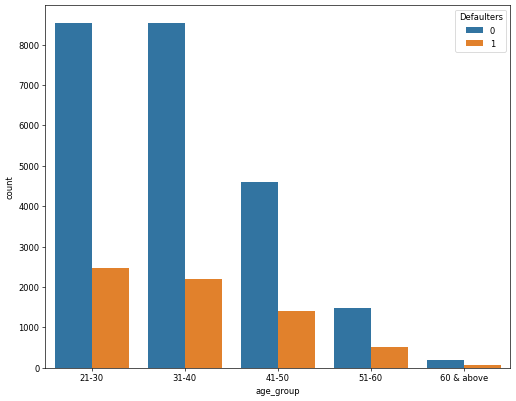

In [358]:
#visualizing age group
plt.figure(figsize=(10,8),dpi=60)
sns.countplot(x=df['age_group'].sort_values(),data=df,hue='Defaulters')

### obsevation:
- In aur dataset we can clearly see that most of the credit card holder are of age between 21 to 40 , so we can say that company's target customer are mostly youngster.


In [359]:
#checking the dedfault ratio of age_group
df[['Defaulters','age_group']].groupby('age_group').mean().reset_index()

,age_group,Defaulters
0,21-30,0.224371
1,31-40,0.204331
2,41-50,0.232973
3,51-60,0.252379
4,60 & above,0.268382


### observation
- we can clearly see that as the age incearse , chances of the default increase as higher age persons has more default ratio.

In [360]:
# drop age column because now we have age_group in our dataset
df=df.drop('AGE',axis=1)

In [361]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulters,age_group
0,20000,2,2,1,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,21-30
1,120000,2,2,2,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,21-30
2,90000,2,2,2,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,31-40
3,50000,2,2,1,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,31-40
4,50000,1,2,1,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,51-60


In [362]:
# Payment delay description
df[['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']].describe()

,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [363]:
#Previous Payment Description
df[['PAY_AMT_SEPT','PAY_AMT_AUG','PAY_AMT_JUL','PAY_AMT_JUN','PAY_AMT_MAY','PAY_AMT_APR']].describe()

,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [364]:
# Bill Statement description
df[['BILL_AMT_SEPT','BILL_AMT_AUG','BILL_AMT_JUL','BILL_AMT_JUN','BILL_AMT_MAY','BILL_AMT_APR']].describe()

,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


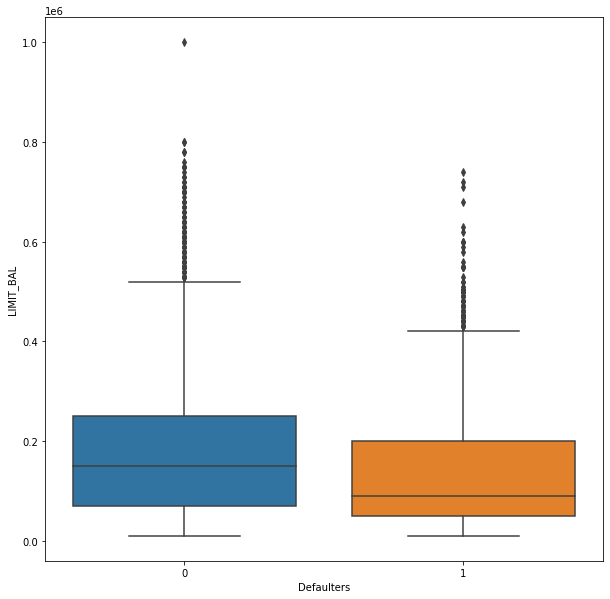

In [365]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Defaulters", y="LIMIT_BAL", data=df)

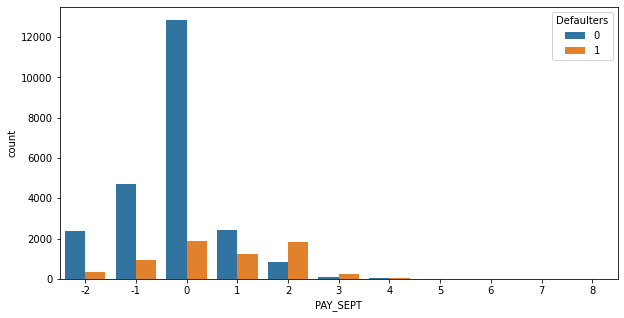

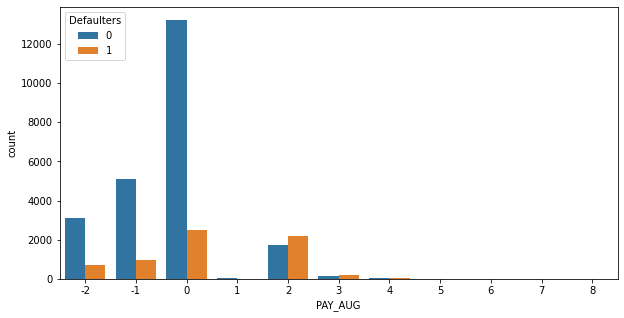

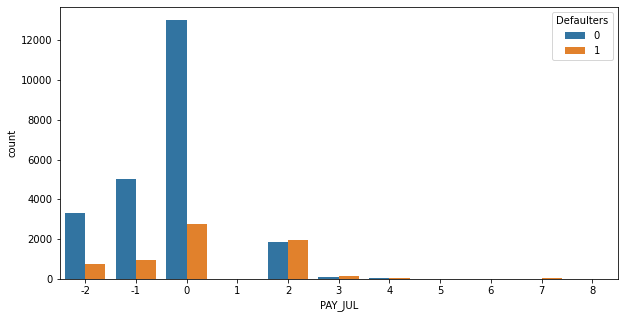

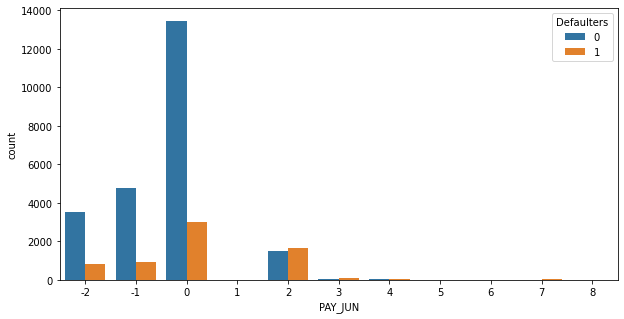

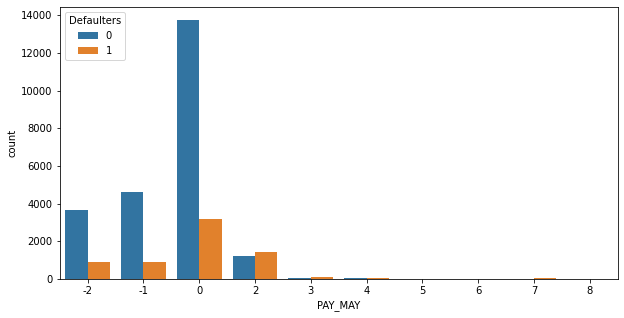

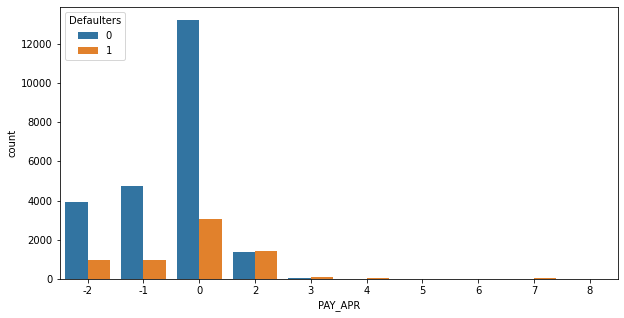

In [366]:
pay_col = ['PAY_SEPT','PAY_AUG','PAY_JUL','PAY_JUN','PAY_MAY','PAY_APR']
for col in pay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'Defaulters', data = df)

# 

In [367]:
# checking info of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LIMIT_BAL      30000 non-null  int64 
 1   SEX            30000 non-null  int64 
 2   EDUCATION      30000 non-null  int64 
 3   MARRIAGE       30000 non-null  int64 
 4   PAY_SEPT       30000 non-null  int64 
 5   PAY_AUG        30000 non-null  int64 
 6   PAY_JUL        30000 non-null  int64 
 7   PAY_JUN        30000 non-null  int64 
 8   PAY_MAY        30000 non-null  int64 
 9   PAY_APR        30000 non-null  int64 
 10  BILL_AMT_SEPT  30000 non-null  int64 
 11  BILL_AMT_AUG   30000 non-null  int64 
 12  BILL_AMT_JUL   30000 non-null  int64 
 13  BILL_AMT_JUN   30000 non-null  int64 
 14  BILL_AMT_MAY   30000 non-null  int64 
 15  BILL_AMT_APR   30000 non-null  int64 
 16  PAY_AMT_SEPT   30000 non-null  int64 
 17  PAY_AMT_AUG    30000 non-null  int64 
 18  PAY_AMT_JUL    30000 non-n

## Using SMOTE(Synthetic Minority Oversampling Technique) to remediate Imbalance in dependent column

In [368]:
X=df.drop('Defaulters',axis=1)

In [369]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,age_group
0,20000,2,2,1,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,21-30
1,120000,2,2,2,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,21-30
2,90000,2,2,2,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,31-40
3,50000,2,2,1,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,31-40
4,50000,1,2,1,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,51-60


In [370]:
#maping numerical value to categorical for easy understanding
X['SEX']=X['SEX'].map({1:'Male',2:'Female'})
X['EDUCATION']=X['EDUCATION'].map({1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'other',5:'other',6:'other',0:'other'})
X['MARRIAGE']=X['MARRIAGE'].map({1 : 'married', 2 : 'single', 3 : 'others',0 : 'others'})

In [371]:
X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,age_group
0,20000,Female,university,married,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,21-30
1,120000,Female,university,single,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,21-30
2,90000,Female,university,single,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,31-40
3,50000,Female,university,married,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,31-40
4,50000,Male,university,married,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,51-60


In [372]:
# one hot encoding for age group
X=pd.get_dummies(X)

In [373]:
X.head()

,LIMIT_BAL,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,SEX_Female,SEX_Male,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single,age_group_21-30,age_group_31-40,age_group_41-50,age_group_51-60,age_group_60 & above
0,20000,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0
1,120000,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0,0,0,0,1,0,0,1,1,0,0,0,0
2,90000,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,1,0,0,0,0,1,0,0,1,0,1,0,0,0
3,50000,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,1,0,0,0,0,1,1,0,0,0,1,0,0,0
4,50000,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,1,0,0,0,1,1,0,0,0,0,0,1,0


In [374]:
y=df['Defaulters']

In [375]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X,y)

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [376]:
(unique, counts) = np.unique(y_smote, return_counts=True)
np.asarray((unique, counts)).T

array([[    0, 23364],
       [    1, 23364]])

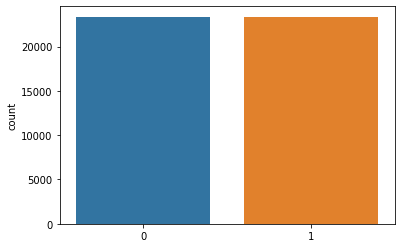

In [377]:
sns.countplot(y_smote)

## Train | Test Split

In [378]:
X_train,X_test,y_train,y_test = train_test_split(X_smote,y_smote,test_size=0.25,random_state=101)

In [379]:
X_train

array([[100000,      0,      0, ...,      0,      0,      0],
       [120000,      1,     -2, ...,      0,      0,      0],
       [320000,     -1,      0, ...,      0,      0,      0],
       ...,
       [340000,     -1,     -1, ...,      0,      1,      0],
       [230000,      2,      0, ...,      0,      0,      0],
       [323461,      0,     -1, ...,      0,      0,      0]])

In [380]:
#Scaling Feature
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

# Creating Function

In [381]:
model_accuracy=[]
model_precision=[]
model_recall=[]
model_f1_score=[]
model_roc_auc_score=[]


In [382]:
# Creating Function to run diferent models
def run_and_evaluate_model(model,X_train,X_test,y_train,y_test, best_parameter=True, best_score=True):
  '''
  train the model and gives mse,rmse,r2,adj r2 score of the model
  can be used for any model where y is not transformed 
  '''

  start=time.time()
  #training the model
  model.fit(X_train,y_train)
  stop = time.time()

  time_min=round((stop - start)/60,4)
  print(f"Training time: {time_min}min",'\n')
  


  #predicting the values of y from x via model
  y_pred_test = model.predict(X_test)
  y_pred_train = model.predict(X_train)

  
  # Get the confusion matrix for both train and test
  from sklearn.metrics import confusion_matrix,classification_report

  def score (model,X,actual,predicted,append=True):
    accuracy = accuracy_score(actual,predicted)
    precision = precision_score(actual,predicted)
    recall = recall_score(actual,predicted)
    f1 = f1_score(actual,predicted)
    roc= roc_auc_score(actual,predicted)
    confusion_mat=confusion_matrix(actual,predicted)
    print("The accuracy is ", accuracy)
    print("The precision is ", precision)
    print("The recall is ", recall)
    print("The f1 is ", f1)
    print('the auc  is ',roc)
    print('\nconfusion_matrix \n ',confusion_mat)
    

    if append==True:
      model_accuracy.append(accuracy)
      model_precision.append(precision)
      model_recall.append(recall)
      model_f1_score.append(f1)
      model_roc_auc_score.append(roc)
    else:
      pass

  print('score matrix for train')
  print('*'*80)
  score(model=model,X=X_train,actual=y_train,predicted=y_pred_train,append=False)
  print('\nClassification Report\n')
  print(classification_report(y_train, y_pred_train))
  print('\n')
  print('score matrix for test')
  print('*'*80)
  score(model=model,X=X_test,actual=y_test,predicted=y_pred_test)
  print('\nClassification Report\n')
  print(classification_report(y_test, y_pred_test))


# creating function to get feature importance 

In [383]:
#creating function to get features importance of all the tree based model
def get_features_importance(optimal_model,X_train):
  imp_feat=pd.DataFrame(index=X.columns,data=optimal_model.feature_importances_,columns=['importance'])
  imp_feat=imp_feat[imp_feat['importance']>0]
  imp_feat=imp_feat.sort_values('importance')
  plt.figure(figsize=(15,5))
  print(f'==========================Features Importance============================\n\n {optimal_model}\
  \n=========================================================================\n') 
  sns.barplot(data=imp_feat,x=imp_feat.index,y='importance')
  plt.xticks(rotation=90);
   

# Logistic Regression

In [384]:
# import Loggistic Regression
from sklearn.linear_model import LogisticRegression

In [385]:
#creating Instance of Logistic Regression

log_model= LogisticRegression()

In [386]:
# creating param dict for hyperparameter tuning
param_dict= {'C': [0.001,0.01,0.1,1,10,100],'penalty': ['l1', 'l2'],'max_iter':[1000]} 

In [387]:
#creating Grid model to perform grid search

grid_log_model = GridSearchCV(log_model, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='accuracy') 

In [388]:
#run_and_score(log_reg_grid, X_test_lr, X_train_lr, y_test, y_train)
run_and_evaluate_model(grid_log_model,scaled_X_train,scaled_X_test,y_train,y_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   10.0s finished


Training time: 0.1733min 

score matrix for train
********************************************************************************
The accuracy is  0.8654625349540603
The precision is  0.9513227513227513
The recall is  0.7701313535122787
The f1 is  0.8511914154962916
the auc  is  0.8653918628875263

confusion_matrix 
  [[16846   690]
 [ 4025 13485]]

Classification Report

              precision    recall  f1-score   support

           0       0.81      0.96      0.88     17536
           1       0.95      0.77      0.85     17510

    accuracy                           0.87     35046
   macro avg       0.88      0.87      0.86     35046
weighted avg       0.88      0.87      0.86     35046



score matrix for test
********************************************************************************
The accuracy is  0.8680876562232495
The precision is  0.9595141700404858
The recall is  0.7692176289716434
The f1 is  0.8538921020195316
the auc  is  0.8683081967782034

confusion_matrix 
  [[

In [389]:
grid_log_model.best_estimator_.coef_

array([[-0.05483435,  0.59162493,  0.10013102,  0.07055172,  0.01854854,
         0.05344118, -0.00379209, -0.29713264,  0.10747569,  0.04652956,
         0.01606472,  0.0197173 , -0.00244194, -0.16251551, -0.15890854,
        -0.05218894, -0.0557491 , -0.07570867, -0.03398066, -1.23573975,
        -1.12122223, -1.13168182, -0.89164226, -0.38068836, -1.28203463,
        -1.12513645, -0.22619963, -1.23709616, -1.27102858, -1.23281315,
        -0.97858616, -0.58120292, -0.21799931]])

In [390]:
grid_log_model.best_params_

{'C': 0.01, 'max_iter': 1000, 'penalty': 'l2'}

# Decision Tree

In [391]:
#impoting decisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
# creating DecisionTree model
DecisionTree = DecisionTreeClassifier(max_depth=10,max_leaf_nodes=45,criterion='entropy')

# training and evaluating the DecisionTree
run_and_evaluate_model(DecisionTree,X_train, X_test, y_train, y_test)

Training time: 0.0087min 

score matrix for train
********************************************************************************
The accuracy is  0.8245734177937568
The precision is  0.9057857142857143
The recall is  0.7242147344374643
The f1 is  0.8048873373532214
the auc  is  0.8244990186785861

confusion_matrix 
  [[16217  1319]
 [ 4829 12681]]

Classification Report

              precision    recall  f1-score   support

           0       0.77      0.92      0.84     17536
           1       0.91      0.72      0.80     17510

    accuracy                           0.82     35046
   macro avg       0.84      0.82      0.82     35046
weighted avg       0.84      0.82      0.82     35046



score matrix for test
********************************************************************************
The accuracy is  0.8260571819893854
The precision is  0.9097341337907375
The recall is  0.7248035531260677
The f1 is  0.8068073778284846
the auc  is  0.8262830394319426

confusion_matrix 
  [[

In [392]:
DecisionTree.feature_importances_

array([0.00714876, 0.2364324 , 0.08701274, 0.00670843, 0.00284606,
       0.        , 0.01763356, 0.00614567, 0.00276075, 0.        ,
       0.        , 0.00668902, 0.        , 0.01453271, 0.02225991,
       0.        , 0.        , 0.00225981, 0.        , 0.01768471,
       0.10236434, 0.00765981, 0.02719562, 0.01915505, 0.01205026,
       0.26640433, 0.05992861, 0.06023126, 0.00318473, 0.0021198 ,
       0.00638643, 0.00320521, 0.        ])

==========================Features Importance============================

 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=45,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')  



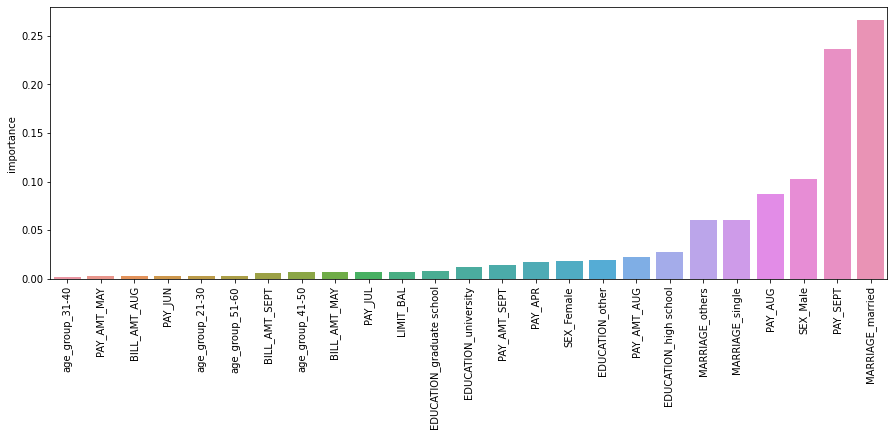

In [393]:
get_features_importance(DecisionTree,X_train)

# Random Forest

In [394]:
from sklearn.ensemble import RandomForestClassifier
rfc_model=RandomForestClassifier()

In [395]:
# finding the best parameters for knn_model by gridsearchcv
grid_values = {'n_estimators': [150,200,250],'max_depth': [3,5,9],'criterion': ['entropy']}
grid_rfc_model = GridSearchCV(estimator=rfc_model,param_grid = grid_values, scoring='balanced_accuracy',cv=5,verbose=5,n_jobs=-1)

In [396]:
run_and_evaluate_model(grid_rfc_model,X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   54.8s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  4.9min finished


Training time: 5.1615min 

score matrix for train
********************************************************************************
The accuracy is  0.8650345260514752
The precision is  0.9042768568897886
The recall is  0.8162764134780126
The f1 is  0.8580261736102774
the auc  is  0.8649983800966704

confusion_matrix 
  [[16023  1513]
 [ 3217 14293]]

Classification Report

              precision    recall  f1-score   support

           0       0.83      0.91      0.87     17536
           1       0.90      0.82      0.86     17510

    accuracy                           0.87     35046
   macro avg       0.87      0.86      0.86     35046
weighted avg       0.87      0.87      0.86     35046



score matrix for test
********************************************************************************
The accuracy is  0.8531929464132854
The precision is  0.8971406639800422
The recall is  0.798599248377178
The f1 is  0.8450067781292364
the auc  is  0.8533147237081498

confusion_matrix 
  [[5

In [397]:
grid_rfc_model.best_params_

{'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 200}

In [398]:
grid_rfc_model.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [399]:
optimal__rfc_model=grid_rfc_model.best_estimator_

==========================Features Importance============================

 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)  



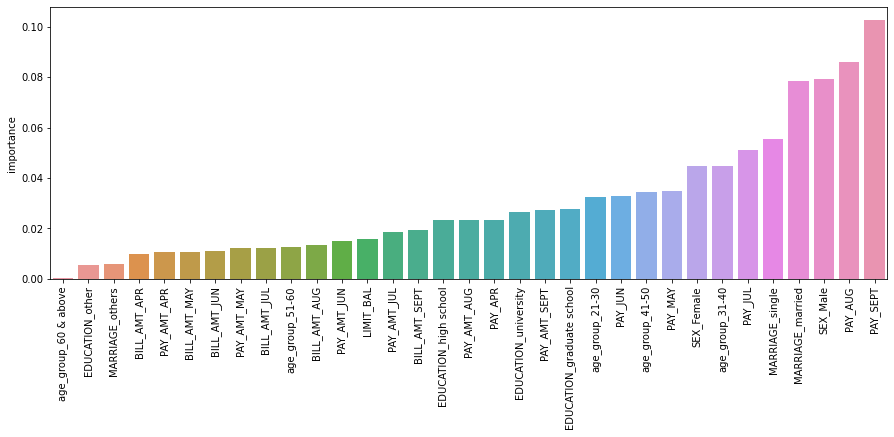

In [400]:
get_features_importance(optimal__rfc_model,X_train)

# Support Vector Machine

In [401]:
from sklearn.svm import SVC
svc_model=SVC()

In [402]:
params={'C':[0.01,0.1,1],'kernel':['rbf']}
svc_grid_model= GridSearchCV(svc_model,param_grid=params)

In [403]:
run_and_evaluate_model(svc_grid_model,scaled_X_train,scaled_X_test,y_train,y_test)

Training time: 13.5051min 

score matrix for train
********************************************************************************
The accuracy is  0.8757632825429436
The precision is  0.9486427499658983
The recall is  0.794346087949743
The f1 is  0.8646649260226285
the auc  is  0.8757029253617329

confusion_matrix 
  [[16783   753]
 [ 3601 13909]]

Classification Report

              precision    recall  f1-score   support

           0       0.82      0.96      0.89     17536
           1       0.95      0.79      0.86     17510

    accuracy                           0.88     35046
   macro avg       0.89      0.88      0.87     35046
weighted avg       0.89      0.88      0.87     35046



score matrix for test
********************************************************************************
The accuracy is  0.8723677452491012
The precision is  0.9500722096141944
The recall is  0.7866416125725999
The f1 is  0.8606672273619288
the auc  is  0.8725589668902807

confusion_matrix 
  [[

In [404]:
svc_grid_model.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [405]:
svc_grid_model.best_params_

{'C': 1, 'kernel': 'rbf'}

---
#XGboost
---

In [406]:
from xgboost import XGBClassifier

In [407]:
# creating XGBRegressor model
xgboost_model=XGBClassifier()

In [408]:
# finding the best parameters for XGBRegressor by gridsearchcv
params={'n_estimators': [50,100,150],'max_depth': [3,5,9]}
grid_xgboost_model=GridSearchCV(estimator=xgboost_model,param_grid=params,cv=5,scoring='balanced_accuracy',verbose=5,n_jobs=-1)

In [409]:
# training and evaluating the xgb_grid
run_and_evaluate_model(grid_xgboost_model,X_train,X_test,y_train,y_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  4.9min finished


Training time: 5.3172min 

score matrix for train
********************************************************************************
The accuracy is  0.9450436569080637
The precision is  0.9852410013700337
The recall is  0.9035408338092519
The f1 is  0.9426239275500476
the auc  is  0.9450128895323632

confusion_matrix 
  [[17299   237]
 [ 1689 15821]]

Classification Report

              precision    recall  f1-score   support

           0       0.91      0.99      0.95     17536
           1       0.99      0.90      0.94     17510

    accuracy                           0.95     35046
   macro avg       0.95      0.95      0.94     35046
weighted avg       0.95      0.95      0.94     35046



score matrix for test
********************************************************************************
The accuracy is  0.8784454716658107
The precision is  0.9333463643471462
The recall is  0.815681585240861
The f1 is  0.870556061987238
the auc  is  0.8785854734714943

confusion_matrix 
  [[54

In [410]:
grid_xgboost_model.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [411]:
optimal_xgboost_model=grid_xgboost_model.best_estimator_

==========================Features Importance============================

 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)  



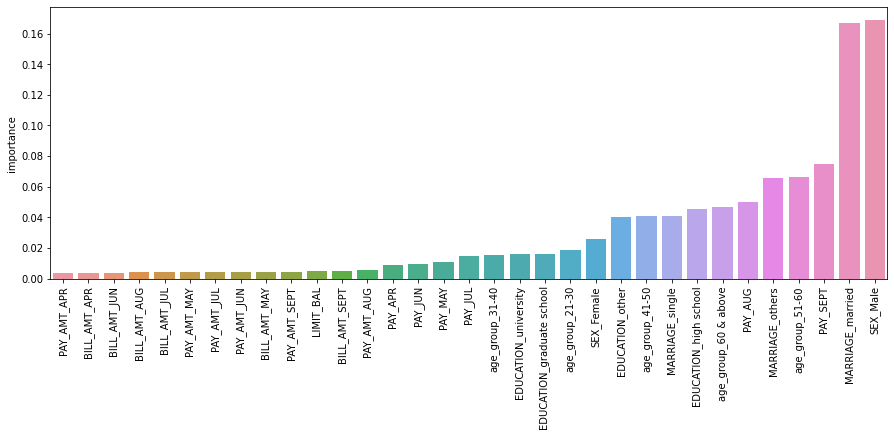

In [412]:
get_features_importance(optimal_xgboost_model,X_train)

---
# CatBoost
---

In [413]:
!pip install catboost

In [414]:
from catboost import CatBoostClassifier

In [415]:
cb_model=CatBoostClassifier(verbose=0)

In [416]:
cb_model=CatBoostClassifier()

In [417]:
# finding the best parameters for XGBRegressor by gridsearchcv
params={'n_estimators': [50,100,150],'max_depth': [3,5,9]}
grid_cb_model=GridSearchCV(estimator=cb_model,param_grid=params,cv=3,scoring='balanced_accuracy',verbose=0,n_jobs=-1)

In [418]:
# training and evaluating the catBoost
run_and_evaluate_model(grid_cb_model,X_train,X_test,y_train,y_test)

Learning rate set to 0.267929
0:	learn: 0.6362222	total: 8.79ms	remaining: 1.31s
1:	learn: 0.5265453	total: 17.9ms	remaining: 1.33s
2:	learn: 0.5051498	total: 25.5ms	remaining: 1.25s
3:	learn: 0.4899455	total: 33.5ms	remaining: 1.22s
4:	learn: 0.4521697	total: 43.1ms	remaining: 1.25s
5:	learn: 0.4414204	total: 50.8ms	remaining: 1.22s
6:	learn: 0.4248010	total: 58.9ms	remaining: 1.2s
7:	learn: 0.4177597	total: 66.8ms	remaining: 1.19s
8:	learn: 0.4122342	total: 75.1ms	remaining: 1.18s
9:	learn: 0.4056231	total: 83.1ms	remaining: 1.16s
10:	learn: 0.3993967	total: 91.5ms	remaining: 1.16s
11:	learn: 0.3851174	total: 99.8ms	remaining: 1.15s
12:	learn: 0.3818749	total: 109ms	remaining: 1.14s
13:	learn: 0.3794886	total: 117ms	remaining: 1.14s
14:	learn: 0.3767006	total: 125ms	remaining: 1.12s
15:	learn: 0.3746042	total: 132ms	remaining: 1.11s
16:	learn: 0.3669016	total: 141ms	remaining: 1.11s
17:	learn: 0.3652776	total: 150ms	remaining: 1.1s
18:	learn: 0.3634065	total: 158ms	remaining: 1.09s
1

In [419]:
optimal_catboost_model=grid_cb_model.best_estimator_

In [420]:
grid_cb_model.best_estimator_.feature_importances_

array([ 0.38897625,  2.87123562,  1.10824849,  3.18279443,  0.12228915,
        0.47001587,  0.11230374,  0.5574039 ,  0.21675351,  0.17646833,
        0.14951754,  0.17284527,  0.09930398,  0.32517623,  0.25164075,
        0.27603065,  0.09400057,  0.11204044,  0.16659036, 30.55643216,
       26.68381481,  4.27409453,  2.90080962,  0.53896072,  4.59469343,
        5.65782797,  0.19239513,  5.91063278,  2.51841234,  2.61917252,
        1.89540728,  0.67633856,  0.12737307])

==========================Features Importance============================




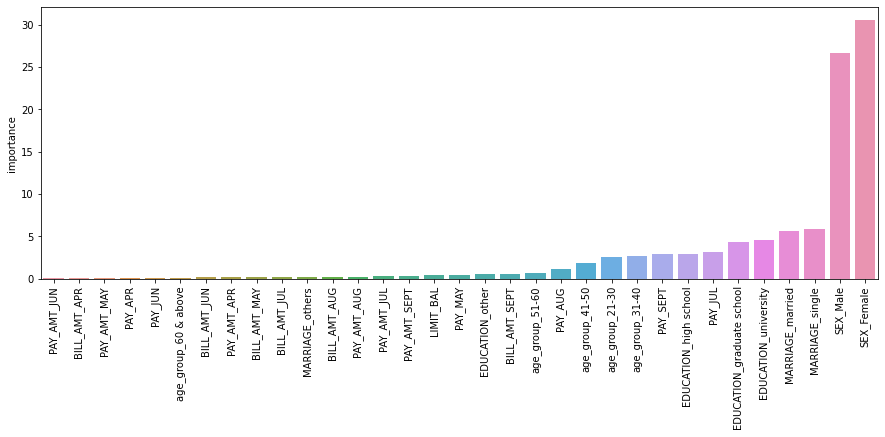

In [421]:
get_features_importance(optimal_catboost_model,X_train)

In [422]:
grid_cb_model.best_params_

{'max_depth': 3, 'n_estimators': 150}

# Model's Score matrix

In [423]:
#creating dictionary to store all the metrices 
dict={'accuracy':model_accuracy,'precision':model_precision,'recall':model_recall,'f1':model_f1_score,'roc_auc':model_roc_auc_score}

In [426]:
# list of all models
model_name=['Logestic Regrestion','Desision Tree','Random forest','SVM','XGboost','CATBoost']

In [427]:
# converting dictionary to dataframe
matrix_df=pd.DataFrame.from_dict(dict,orient="index",columns=model_name)

In [428]:
# taking the transpose of the dataframe to make it more visual appealing
matrix_df.transpose().reset_index().rename(columns={'index':'Models'})

,Models,accuracy,precision,recall,f1,roc_auc
0,Logestic Regrestion,0.868088,0.959514,0.769218,0.853892,0.868308
1,Desision Tree,0.826057,0.909734,0.724804,0.806807,0.826283
2,Random forest,0.853193,0.897141,0.798599,0.845007,0.853315
3,SVM,0.872368,0.950072,0.786642,0.860667,0.872559
4,XGboost,0.878445,0.933346,0.815682,0.870556,0.878585
5,CATBoost,0.874165,0.939279,0.800649,0.864441,0.874329
